## AI Usage

This Notebook answeres the question:

How does the usage of AI tools correlate with developers' concerns about AI'spotential threats?

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df_schema= pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_schema.csv')
df_public = pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_public.csv')

df_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [2]:
df_public.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
df_public.columns.values.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa


---

## Data Understanding

First, we need to identify the data required to answer the question. To determine if developers are using any AI tools, we will use the data from *AISelect*. Additionally, we should analyze which aspects of their projects involve AI and how they rate the accuracy of these tools. For that, we need *AIAcc* and *AIChallenges*. There may also be a correlation between the importance developers place on ethical responsibilities and their concerns about AI being a threat to their jobs. Thus, we will include *AIThreat* and *AIEthics* as well.

---

In [4]:
# let's create the dataframe we need from df_public
df_q2 = df_public[[ 'AISelect', 'AIAcc', 'AIChallenges', 'AIThreat']].copy()

df_q2.head()

,AISelect,AIAcc,AIChallenges,AIThreat
0,Yes,NaN,NaN,NaN
1,"No, and I don't plan to",NaN,NaN,NaN
2,"No, and I don't plan to",NaN,NaN,NaN
3,Yes,Somewhat trust,Don’t trust the output or answers,No
4,"No, and I don't plan to",NaN,NaN,NaN


In [5]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AISelect      60907 non-null  object
 1   AIAcc         37302 non-null  object
 2   AIChallenges  37531 non-null  object
 3   AIThreat      44689 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB



---

## Data Preparation

Since *AISelect* is the target variable, we should drop all rows where it contains a NaN value, as it would be impossible to determine whether the participant uses an AI tool, plans to use one, or does not intend to use one. It is also crucial to know whether participants perceive AI as a threat to their job, so any NaN values in the *AIThreat* column should also be dropped. For the remaining columns, we can fill NaN values with "unknown," as these missing values do not significantly impact the assessment of whether developers view AI as a potential threat.

---

In [6]:
# Drop rows where all relevant columns are NaN
df_q2 = df_q2.dropna(subset=['AISelect','AIThreat'])

for column in ['AIAcc', 'AIChallenges']:
    df_q2[column] = df_q2[column].fillna('Unknown')  # Replace NaN with a placeholder = Unknown

In [7]:
df_q2.head()

,AISelect,AIAcc,AIChallenges,AIThreat
3,Yes,Somewhat trust,Don’t trust the output or answers,No
5,Yes,Somewhat trust,Unknown,No
7,Yes,Somewhat distrust,Don’t trust the output or answers;AI tools lac...,Yes
9,Yes,Neither trust nor distrust,Unknown,I'm not sure
10,Yes,Somewhat distrust,Don’t trust the output or answers;AI tools lac...,No


In [8]:
df_q2.to_csv('../data/processed/df_q2.csv', index=False)
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 3 to 65432
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AISelect      44689 non-null  object
 1   AIAcc         44689 non-null  object
 2   AIChallenges  44689 non-null  object
 3   AIThreat      44689 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB



---

As we can see, there are no NaN values anymore. The next step is to encode the categorical variables into numerical values so that we can train machine learning models. Here's how we should proceed:

- **Ordinal Encoding** for *AISelect*: Convert the *AISelect* column into ordinal values based on the responses' order.
- **Categorical Encoding** for *AIAcc* and *AIThreat*: Convert these columns into numerical values or dummy variables, depending on the number of categories.
- **One-Hot Encoding** for *AIChallenges*: Since we cannot rank or structure the relevance of responses in the *AIChallenges* column, we should create separate columns for each possible answer using one-hot encoding.

---

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'AISelect' column
df_q2["AISelect"] = df_q2["AISelect"].map(
    {"Yes": 1, "No, and I don't plan to": 0, "No, but I plan to soon": 2}
)

# Encoding 'AIAcc', 'AIChallenges', and 'AIThreat' columns
label_encoders = {}
for column in ["AIAcc", "AIThreat"]:
    le = LabelEncoder()
    df_q2[column] = df_q2[column].fillna("Unknown")  # Replace NaN with a placeholder
    df_q2[column] = le.fit_transform(df_q2[column])
    label_encoders[column] = le


# Function to split values and one-hot encode across columns
def one_hot_encode_across_columns(df, columns_to_encode):
    for column in columns_to_encode:
        for index, row in df.iterrows():
            # Split the values by ';'
            values = row[column].split(";")

            for value in values:
                # Strip leading/trailing whitespaces
                value = column + "_" + value.strip()

                # Check if the column already exists, if not create it
                if value not in df.columns:
                    df[value] = 0  # Initialize column with 0s

                # Set the corresponding row's value to 1 for that column
                df.at[index, value] = 1

    return df


# List of columns to encode
columns_to_encode = ["AIChallenges"]

# Apply the function
df_q2 = one_hot_encode_across_columns(df_q2, columns_to_encode)

# Drop the original 'AIChallenges' and 'AIEthics' columns if desired
df_q2 = df_q2.drop(columns=columns_to_encode)

In [10]:
df_q2.head()

,AISelect,AIAcc,AIThreat,AIChallenges_Don’t trust the output or answers,AIChallenges_Unknown,"AIChallenges_AI tools lack context of codebase, internal architecture, and/or company knowledge",AIChallenges_Lack of proper training and education on new tools,AIChallenges_Lack of executive buy-in,AIChallenges_Not everyone uses them,AIChallenges_We don’t have the right policies in place to reduce security risks,AIChallenges_Other (please specify):,"AIChallenges_They create more work (more code/PRs to review, etc.)"
3,1,4,1,1,0,0,0,0,0,0,0,0
5,1,4,1,0,1,0,0,0,0,0,0,0
7,1,3,2,1,0,1,0,0,0,0,0,0
9,1,2,0,0,1,0,0,0,0,0,0,0
10,1,3,1,1,0,1,1,0,0,0,0,0


In [11]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 3 to 65432
Data columns (total 12 columns):
 #   Column                                                                                            Non-Null Count  Dtype
---  ------                                                                                            --------------  -----
 0   AISelect                                                                                          44689 non-null  int64
 1   AIAcc                                                                                             44689 non-null  int32
 2   AIThreat                                                                                          44689 non-null  int32
 3   AIChallenges_Don’t trust the output or answers                                                    44689 non-null  int64
 4   AIChallenges_Unknown                                                                              44689 non-null  int64
 5   AIChallenges_AI 

After that we should normalize the data.

In [12]:
# Standardize the features
scaler = StandardScaler()
df_q2_scaled = scaler.fit_transform(df_q2)


Now lets try to apply k-means clustering. therefore we must determine the optimal number of clusters with the elbow method.

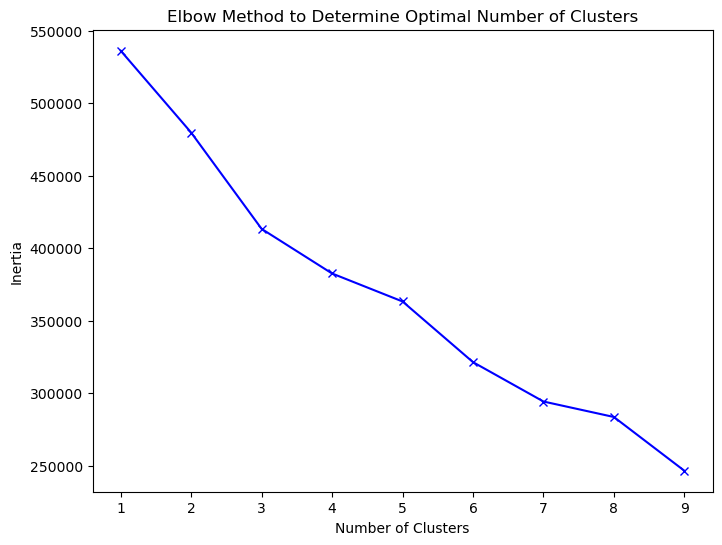

In [13]:
from sklearn.cluster import KMeans


# Plotting the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_q2_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.show()

Lets say the optimal number for clusters is 3.

In [14]:
# Set the number of clusters based on the elbow plot (3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model to your scaled data
kmeans.fit(df_q2_scaled)

# Add the cluster labels to your original DataFrame (optional)
df_q2['Cluster'] = kmeans.labels_

# View the DataFrame with the new 'Cluster' column
df_q2.head(10)

,AISelect,AIAcc,AIThreat,AIChallenges_Don’t trust the output or answers,AIChallenges_Unknown,"AIChallenges_AI tools lack context of codebase, internal architecture, and/or company knowledge",AIChallenges_Lack of proper training and education on new tools,AIChallenges_Lack of executive buy-in,AIChallenges_Not everyone uses them,AIChallenges_We don’t have the right policies in place to reduce security risks,AIChallenges_Other (please specify):,"AIChallenges_They create more work (more code/PRs to review, etc.)",Cluster
3,1,4,1,1,0,0,0,0,0,0,0,0,1
5,1,4,1,0,1,0,0,0,0,0,0,0,2
7,1,3,2,1,0,1,0,0,0,0,0,0,1
9,1,2,0,0,1,0,0,0,0,0,0,0,2
10,1,3,1,1,0,1,1,0,0,0,0,0,1
13,1,1,0,0,1,0,0,0,0,0,0,0,2
16,1,3,1,0,1,0,0,0,0,0,0,0,2
17,2,5,0,0,0,0,0,1,0,0,0,0,0
18,1,2,1,0,0,0,0,0,1,0,0,0,0
20,1,4,0,0,0,0,1,0,1,0,0,0,0


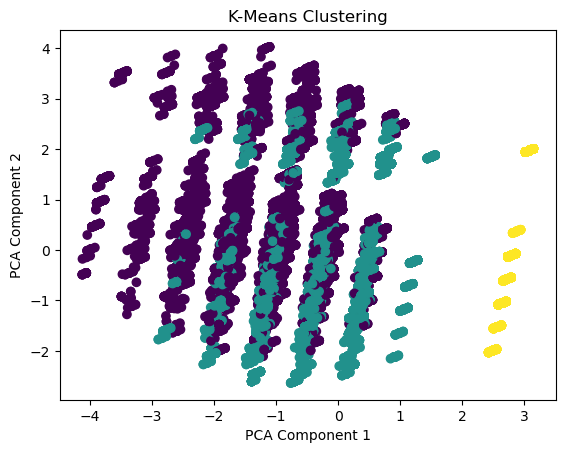

In [15]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_q2_scaled)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [16]:
# Group by cluster to analyze the characteristics of each cluster
cluster_summary = df_q2.groupby('Cluster').mean()
print(cluster_summary)

         AISelect     AIAcc  AIThreat  \
Cluster                                 
0        1.181617  3.377009  0.923221   
1        1.183750  3.149027  0.930827   
2        1.208049  3.396324  0.887759   

         AIChallenges_Don’t trust the output or answers  AIChallenges_Unknown  \
Cluster                                                                         
0                                              0.526231                   0.0   
1                                              0.708937                   0.0   
2                                              0.000000                   1.0   

         AIChallenges_AI tools lack context of codebase,  internal architecture, and/or company knowledge  \
Cluster                                                                                                     
0                                                  0.55412                                                  
1                                                  0.64858   

<h1>Cluster Summaries</h1>

<div class="cluster">
    <h2>Cluster 0</h2>
    <p><strong>AI Selection:</strong> Moderate inclination towards AI adoption (1.18).</p>
    <p><strong>AI Trust:</strong> Highest trust level in AI technologies (3.38), indicating confidence in AI outputs.</p>
    <p><strong>Perceived Threat:</strong> Moderate concern regarding AI threats (0.92), suggesting awareness of risks but an overall positive outlook.</p>
    <p><strong>Challenges:</strong></p>
    <ul>
        <li>Significant issues with <strong>lack of executive buy-in</strong> (0.37).</li>
        <li>High concerns regarding <strong>underutilization of AI tools</strong> (0.80).</li>
        <li>Moderate challenges related to <strong>lack of training and education</strong> (0.45) and <strong>security risks</strong> (0.39).</li>
        <li>Low concern regarding AI creating additional work (0.12).</li>
    </ul>
    <p class="summary"><strong>Summary:</strong> Participants in this cluster show a positive attitude toward AI adoption, characterized by a strong trust in AI technologies. However, they face notable challenges regarding leadership support and effective use of AI tools.</p>
</div>

<div class="cluster">
    <h2>Cluster 1</h2>
    <p><strong>AI Selection:</strong> Similar inclination towards AI adoption as Cluster 0 (1.18).</p>
    <p><strong>AI Trust:</strong> Slightly lower trust level (3.15) compared to Cluster 0, indicating more skepticism.</p>
    <p><strong>Perceived Threat:</strong> Moderate AI threat perception (0.93), reflecting cautiousness about AI risks.</p>
    <p><strong>Challenges:</strong></p>
    <ul>
        <li>High concern regarding <strong>trusting AI outputs</strong> (0.71).</li>
        <li>Moderate challenges with <strong>lack of training</strong> (0.25) and <strong>lack of executive buy-in</strong> (0.0007).</li>
        <li>Significant concerns about <strong>not everyone using AI tools</strong> (0.0001) and <strong>additional work generated by AI</strong> (0.14).</li>
    </ul>
    <p class="summary"><strong>Summary:</strong> This cluster exhibits a slightly more skeptical view of AI adoption, with considerable concerns about the reliability of AI outputs and the need for training. The challenges they face could hinder effective integration of AI technologies.</p>
</div>

<div class="cluster">
    <h2>Cluster 2</h2>
    <p><strong>AI Selection:</strong> Highest inclination towards AI adoption (1.21), indicating a proactive stance.</p>
    <p><strong>AI Trust:</strong> Moderate trust level (3.40), suggesting confidence, though slightly cautious.</p>
    <p><strong>Perceived Threat:</strong> Lowest perceived threat (0.89), indicating less concern about AI risks.</p>
    <p><strong>Challenges:</strong></p>
    <ul>
        <li>No concerns related to <strong>trusting AI outputs</strong> (0.00), indicating confidence in the technology.</li>
        <li>Minimal issues with <strong>lack of training</strong> (0.00), suggesting participants feel adequately prepared.</li>
        <li>Very low challenges related to <strong>executive buy-in</strong> (0.00) and <strong>security risks</strong> (0.00).</li>
        <li>Moderate concern regarding <strong>underutilization of AI tools</strong> (0.00) and <strong>additional work</strong> (0.00).</li>
    </ul>
    <p class="summary"><strong>Summary:</strong> Participants in this cluster have a very favorable view of AI, showing confidence and a lack of perceived challenges. Their proactive approach could serve as a model for other groups facing more significant hurdles in AI adoption.</p>
</div>


---

### Conclusion

The clustering analysis reveals distinct attitudes and perceptions regarding AI adoption and associated challenges among the surveyed participants. 

1. **AI Selection and Acceptance**: 
   - Clusters 0 and 1 show similar levels of AI selection (approximately 1.18), suggesting a consistent inclination towards adopting AI technologies. Cluster 2, however, demonstrates a slightly higher inclination (1.21), indicating a potentially more optimistic view towards AI adoption among its members.

2. **Trust in AI**: 
   - The average scores for AI acceptance (AIAcc) across all clusters suggest a generally moderate to high level of trust, with Cluster 0 reporting the highest trust level (3.38) and Cluster 2 the lowest (3.39). This indicates that trust in AI technologies varies but remains relatively positive overall.

3. **Perceived Threats**: 
   - The AI threat perceptions show that clusters 0 and 1 have similar scores (around 0.92), implying a notable concern regarding the risks associated with AI implementation. In contrast, Cluster 2 exhibits a lower threat perception (0.89), suggesting that this cluster may either have more confidence in managing AI risks or face fewer perceived threats.

4. **Challenges**: 
   - Each cluster presents a unique profile concerning AI challenges. For instance:
     - **Cluster 0** highlights significant concerns around lack of executive buy-in (0.37) and underutilization of AI tools (0.80). 
     - **Cluster 1** reflects a more prominent challenge in trusting AI output (0.71) and a moderate lack of training (0.25).
     - **Cluster 2** tends to exhibit fewer challenges, with a complete absence of issues regarding trust in AI tools or training needs, indicating a potential difference in experience or maturity level in AI adoption.

5. **Strategic Insights**: 
   - Organizations aiming to promote AI adoption should address specific challenges highlighted in each cluster. Targeted training programs, enhanced communication from leadership, and building a robust framework for integrating AI tools could help mitigate resistance and foster a more favorable environment for AI technologies.

